In [5]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [6]:
# Read data
gist_data_url = 'https://gist.githubusercontent.com/seankross/a412dfbd88b3db70b74b/raw/5f23f993cd87c283ce766e7ac6b329ee7cc2e1d1/mtcars.csv'
df = pd.read_csv(gist_data_url)

In [8]:
# Display Some Data
print(df.head())

               model   mpg  cyl   disp   hp  drat     wt   qsec  vs  am  gear  \
0          Mazda RX4  21.0    6  160.0  110  3.90  2.620  16.46   0   1     4   
1      Mazda RX4 Wag  21.0    6  160.0  110  3.90  2.875  17.02   0   1     4   
2         Datsun 710  22.8    4  108.0   93  3.85  2.320  18.61   1   1     4   
3     Hornet 4 Drive  21.4    6  258.0  110  3.08  3.215  19.44   1   0     3   
4  Hornet Sportabout  18.7    8  360.0  175  3.15  3.440  17.02   0   0     3   

   carb  
0     4  
1     4  
2     1  
3     1  
4     2  


Text(0.5, 1.0, 'Engine Size vs Fuel Efficiency')

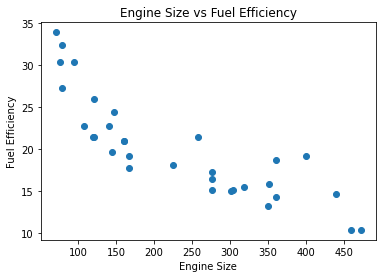

In [23]:
# Engine Size vs. Fuel Efficiency
plt.scatter(x=df.disp, y=df.mpg)
plt.xlabel('Engine Size')
plt.ylabel('Fuel Efficiency')
plt.title('Engine Size vs Fuel Efficiency')

In [24]:
# Computing the optimal coefficients


In [40]:
# Computing the Optimal Coefficients

X = [5.1, 6.2, 5.8, 5.5, 5.0, 5.3, 6.0]
Y = [54, 75, 67, 65, 54, 59, 69]
data = pd.DataFrame(data=list(zip(X, Y)), columns=['X', 'Y'])

X = data.iloc[:, 0]
Y = data.iloc[:, 1]

# Learning rate
L = 0.0001

# Iterations
epochs = 1000

# Coefficients
w = 0
b = 0
n = float(len(X))

for i in range(epochs):
    # Predicted Value
    pred = w*X + b
    
    # Partial Derivative (w)
    Der_w = (-2/n) * sum(X*(Y-pred))
    # Partial Derivative (b)
    Der_b = (-2/n) * sum(Y - pred)